In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Loading data...")
df = pd.read_csv('../data/raw/insurance_data.txt', delimiter='|', low_memory=False)
print(f"Shape: {df.shape}")
print(f"Rows: {df.shape[0]:,}")
print(f"Columns: {df.shape[1]}")

Loading data...
Shape: (1000098, 52)
Rows: 1,000,098
Columns: 52


In [15]:
# Show columns
print("Columns:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

Columns:
 1. UnderwrittenCoverID
 2. PolicyID
 3. TransactionMonth
 4. IsVATRegistered
 5. Citizenship
 6. LegalType
 7. Title
 8. Language
 9. Bank
10. AccountType
11. MaritalStatus
12. Gender
13. Country
14. Province
15. PostalCode
16. MainCrestaZone
17. SubCrestaZone
18. ItemType
19. mmcode
20. VehicleType
21. RegistrationYear
22. make
23. Model
24. Cylinders
25. cubiccapacity
26. kilowatts
27. bodytype
28. NumberOfDoors
29. VehicleIntroDate
30. CustomValueEstimate
31. AlarmImmobiliser
32. TrackingDevice
33. CapitalOutstanding
34. NewVehicle
35. WrittenOff
36. Rebuilt
37. Converted
38. CrossBorder
39. NumberOfVehiclesInFleet
40. SumInsured
41. TermFrequency
42. CalculatedPremiumPerTerm
43. ExcessSelected
44. CoverCategory
45. CoverType
46. CoverGroup
47. Section
48. Product
49. StatutoryClass
50. StatutoryRiskType
51. TotalPremium
52. TotalClaims


In [16]:
# Cell 2: Check the first few rows
print("First 3 rows of data:")
df.head(3)

First 3 rows of data:


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [17]:
# Cell 3: Check data types
print("Data types:")
print(df.dtypes.value_counts())
print("\nSample of columns and their types:")
for col in df.columns[:10]:  # First 10 columns
    print(f"{col}: {df[col].dtype}")

Data types:
object     36
float64    11
int64       4
bool        1
Name: count, dtype: int64

Sample of columns and their types:
UnderwrittenCoverID: int64
PolicyID: int64
TransactionMonth: object
IsVATRegistered: bool
Citizenship: object
LegalType: object
Title: object
Language: object
Bank: object
AccountType: object


In [18]:
missing = df.isnull().sum()
missing = missing[missing > 0]
print(f"Number of columns with missing values: {len(missing)}")

# show top 10 cols with most missing values
print('Top 10 columns with missing values:')

missing_df = pd.DataFrame({
    'missing_count':missing[missing > 0],
    'missing_percent': (missing[missing > 0] / len(df)) *100
}).sort_values(by='missing_percent', ascending=False).head(10)

print(missing_df)


Number of columns with missing values: 22
Top 10 columns with missing values:
                         missing_count  missing_percent
NumberOfVehiclesInFleet        1000098       100.000000
CrossBorder                     999400        99.930207
CustomValueEstimate             779642        77.956560
Converted                       641901        64.183810
Rebuilt                         641901        64.183810
WrittenOff                      641901        64.183810
NewVehicle                      153295        15.327998
Bank                            145961        14.594670
AccountType                      40232         4.022806
Gender                            9536         0.953507


In [19]:
key_columns = ['TotalPremium', 'TotalClaims', 'Province', 'VehicleType', 'Gender', 'TransactionMonth']
print("Checking key columns from assignment:")

for col in key_columns:
    if col in df.columns:
        print(f"\n{col}:")
        print(f"  Type: {df[col].dtype}")
        print(f"  Missing: {df[col].isnull().sum()} ({df[col].isnull().sum()/len(df)*100:.1f}%)")
        if df[col].dtype == 'object':
            print(f"  Unique values: {df[col].nunique()}")
            print(f"  Sample values: {df[col].unique()[:5] if df[col].nunique() > 5 else df[col].unique()}")
    else:
        print(f"\n{col}: NOT FOUND in data")

Checking key columns from assignment:

TotalPremium:
  Type: float64
  Missing: 0 (0.0%)

TotalClaims:
  Type: float64
  Missing: 0 (0.0%)

Province:
  Type: object
  Missing: 0 (0.0%)
  Unique values: 9
  Sample values: ['Gauteng' 'KwaZulu-Natal' 'Mpumalanga' 'Eastern Cape' 'Western Cape']

VehicleType:
  Type: object
  Missing: 552 (0.1%)
  Unique values: 5
  Sample values: ['Passenger Vehicle' 'Medium Commercial' 'Heavy Commercial'
 'Light Commercial' 'Bus' nan]

Gender:
  Type: object
  Missing: 9536 (1.0%)
  Unique values: 3
  Sample values: ['Not specified' 'Male' 'Female' nan]

TransactionMonth:
  Type: object
  Missing: 0 (0.0%)
  Unique values: 23
  Sample values: ['2015-03-01 00:00:00' '2015-05-01 00:00:00' '2015-07-01 00:00:00'
 '2015-01-01 00:00:00' '2015-04-01 00:00:00']


In [20]:
# Cell 7: Convert TransactionMonth to datetime
print("Converting TransactionMonth to datetime...")
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')

# Check the date range
print(f"Date range: {df['TransactionMonth'].min()} to {df['TransactionMonth'].max()}")
print(f"Total months: {(df['TransactionMonth'].max() - df['TransactionMonth'].min()).days / 30:.1f} months")

Converting TransactionMonth to datetime...
Date range: 2013-10-01 00:00:00 to 2015-08-01 00:00:00
Total months: 22.3 months


In [21]:
print("Calculating Loss Ratio...")

# First, check for zeros in TotalPremium (division by zero)
zero_premium = (df['TotalPremium'] == 0).sum()
print(f"Rows with zero premium: {zero_premium}")

# Calculate Loss Ratio, handling division by zero
df['LossRatio'] = np.where(
    df['TotalPremium'] > 0,
    df['TotalClaims'] / df['TotalPremium'],
    np.nan  # Set to NaN if premium is zero
)

# Overall portfolio metrics
total_premium = df['TotalPremium'].sum()
total_claims = df['TotalClaims'].sum()
overall_loss_ratio = total_claims / total_premium

print(f"\nOVERALL PORTFOLIO:")
print(f"Total Premium: R {total_premium:,.2f}")
print(f"Total Claims: R {total_claims:,.2f}")
print(f"Overall Loss Ratio: {overall_loss_ratio:.3f} ({overall_loss_ratio:.2%})")

print(f"\nWhat does this mean?")
if overall_loss_ratio < 1:
    print(f"✓ GOOD: Loss Ratio < 1 means the portfolio is PROFITABLE")
    print(f"✓ For every R1 in premium, claims cost R{overall_loss_ratio:.2f}")
else:
    print(f"✗ WARNING: Loss Ratio > 1 means the portfolio is LOSING MONEY")
    print(f"✗ For every R1 in premium, claims cost R{overall_loss_ratio:.2f}")

Calculating Loss Ratio...
Rows with zero premium: 381634

OVERALL PORTFOLIO:
Total Premium: R 61,911,562.70
Total Claims: R 64,867,546.17
Overall Loss Ratio: 1.048 (104.77%)

What does this mean?
✗ WARNING: Loss Ratio > 1 means the portfolio is LOSING MONEY
✗ For every R1 in premium, claims cost R1.05


In [22]:
# Cell 12: Investigate zero premium policies
print("=" * 60)
print("INVESTIGATING ZERO PREMIUM POLICIES")
print("=" * 60)

# Create a flag for zero premium
df['ZeroPremium'] = df['TotalPremium'] == 0

print(f"Zero premium policies: {df['ZeroPremium'].sum():,} ({df['ZeroPremium'].mean():.1%})")

# Check if zero premium policies have claims
zero_premium_with_claims = df[(df['ZeroPremium']) & (df['TotalClaims'] > 0)].shape[0]
print(f"Zero premium policies WITH claims: {zero_premium_with_claims:,}")

# Look at coverage types for zero premium policies
if 'CoverType' in df.columns:
    zero_premium_coverage = df[df['ZeroPremium']]['CoverType'].value_counts().head(10)
    print("\nTop 10 Coverage Types with Zero Premium:")
    print(zero_premium_coverage)

INVESTIGATING ZERO PREMIUM POLICIES
Zero premium policies: 381,634 (38.2%)
Zero premium policies WITH claims: 147

Top 10 Coverage Types with Zero Premium:
CoverType
Own Damage                                 39529
Passenger Liability                        39528
Windscreen                                 39435
Third Party                                39252
Cleaning and Removal of Accident Debris    39045
Keys and Alarms                            39042
Signage and Vehicle Wraps                  39041
Emergency Charges                          39041
Income Protector                           24641
Basic Excess Waiver                        21977
Name: count, dtype: int64


In [23]:

print("=" * 60)
print("LOSS RATIO BY PROVINCE (Valid Premiums Only)")
print("=" * 60)

# Filter out zero premiums for accurate Loss Ratio calculation
df_valid = df[df['TotalPremium'] > 0].copy()

# Calculate Loss Ratio for valid premiums
df_valid['LossRatio'] = df_valid['TotalClaims'] / df_valid['TotalPremium']

# Group by province
province_stats = df_valid.groupby('Province').agg({
    'TotalPremium': 'sum',
    'TotalClaims': 'sum',
    'LossRatio': 'mean',
    'UnderwrittenCoverID': 'count'
}).round(3)

province_stats = province_stats.rename(columns={
    'UnderwrittenCoverID': 'PolicyCount',
    'LossRatio': 'AvgLossRatio'
})

# Calculate actual loss ratio
province_stats['LossRatio'] = province_stats['TotalClaims'] / province_stats['TotalPremium']
province_stats = province_stats.sort_values('LossRatio', ascending=False)

print("\nProvince Analysis (VALID PREMIUMS ONLY):")
print(province_stats[['PolicyCount', 'TotalPremium', 'TotalClaims', 'LossRatio']])

print(f"\nKEY INSIGHTS:")
print(f"1. Highest risk province: {province_stats.index[0]} (LR: {province_stats.iloc[0]['LossRatio']:.3f})")
print(f"2. Lowest risk province: {province_stats.index[-1]} (LR: {province_stats.iloc[-1]['LossRatio']:.3f})")
print(f"3. Most policies: {province_stats['PolicyCount'].idxmax()} ({province_stats['PolicyCount'].max():,} policies)")
print(f"4. Most premium: {province_stats['TotalPremium'].idxmax()} (R{province_stats['TotalPremium'].max():,.2f})")

LOSS RATIO BY PROVINCE (Valid Premiums Only)

Province Analysis (VALID PREMIUMS ONLY):
               PolicyCount  TotalPremium   TotalClaims  LossRatio
Province                                                         
Gauteng             240782  2.405487e+07  2.798127e+07   1.163227
Western Cape         96758  9.810107e+06  1.024226e+07   1.044052
KwaZulu-Natal       111896  1.323578e+07  1.352635e+07   1.021953
North West           89799  7.490508e+06  5.593723e+06   0.746775
Mpumalanga           31663  2.836292e+06  2.035792e+06   0.717765
Limpopo              18009  1.537324e+06  9.918930e+05   0.645207
Eastern Cape         19694  2.140303e+06  1.346308e+06   0.629027
Free State            5932  5.213632e+05  2.659749e+05   0.510153
Northern Cape         3643  3.165581e+05  8.949051e+04   0.282699

KEY INSIGHTS:
1. Highest risk province: Gauteng (LR: 1.163)
2. Lowest risk province: Northern Cape (LR: 0.283)
3. Most policies: Gauteng (240,782 policies)
4. Most premium: Gauteng (R24,

In [24]:
# Cell 13: Loss Ratio by Province (excluding zero premiums)
print("=" * 60)
print("LOSS RATIO BY PROVINCE (Valid Premiums Only)")
print("=" * 60)

# Filter out zero premiums for accurate Loss Ratio calculation
df_valid = df[df['TotalPremium'] > 0].copy()

# Calculate Loss Ratio for valid premiums
df_valid['LossRatio'] = df_valid['TotalClaims'] / df_valid['TotalPremium']

# Group by province
province_stats = df_valid.groupby('Province').agg({
    'TotalPremium': 'sum',
    'TotalClaims': 'sum',
    'LossRatio': 'mean',
    'UnderwrittenCoverID': 'count'
}).round(3)

province_stats = province_stats.rename(columns={
    'UnderwrittenCoverID': 'PolicyCount',
    'LossRatio': 'AvgLossRatio'
})

# Calculate actual loss ratio
province_stats['LossRatio'] = province_stats['TotalClaims'] / province_stats['TotalPremium']
province_stats = province_stats.sort_values('LossRatio', ascending=False)

print("\nProvince Analysis (VALID PREMIUMS ONLY):")
print(province_stats[['PolicyCount', 'TotalPremium', 'TotalClaims', 'LossRatio']])

print(f"\nKEY INSIGHTS:")
print(f"1. Highest risk province: {province_stats.index[0]} (LR: {province_stats.iloc[0]['LossRatio']:.3f})")
print(f"2. Lowest risk province: {province_stats.index[-1]} (LR: {province_stats.iloc[-1]['LossRatio']:.3f})")
print(f"3. Most policies: {province_stats['PolicyCount'].idxmax()} ({province_stats['PolicyCount'].max():,} policies)")
print(f"4. Most premium: {province_stats['TotalPremium'].idxmax()} (R{province_stats['TotalPremium'].max():,.2f})")

LOSS RATIO BY PROVINCE (Valid Premiums Only)

Province Analysis (VALID PREMIUMS ONLY):
               PolicyCount  TotalPremium   TotalClaims  LossRatio
Province                                                         
Gauteng             240782  2.405487e+07  2.798127e+07   1.163227
Western Cape         96758  9.810107e+06  1.024226e+07   1.044052
KwaZulu-Natal       111896  1.323578e+07  1.352635e+07   1.021953
North West           89799  7.490508e+06  5.593723e+06   0.746775
Mpumalanga           31663  2.836292e+06  2.035792e+06   0.717765
Limpopo              18009  1.537324e+06  9.918930e+05   0.645207
Eastern Cape         19694  2.140303e+06  1.346308e+06   0.629027
Free State            5932  5.213632e+05  2.659749e+05   0.510153
Northern Cape         3643  3.165581e+05  8.949051e+04   0.282699

KEY INSIGHTS:
1. Highest risk province: Gauteng (LR: 1.163)
2. Lowest risk province: Northern Cape (LR: 0.283)
3. Most policies: Gauteng (240,782 policies)
4. Most premium: Gauteng (R24,

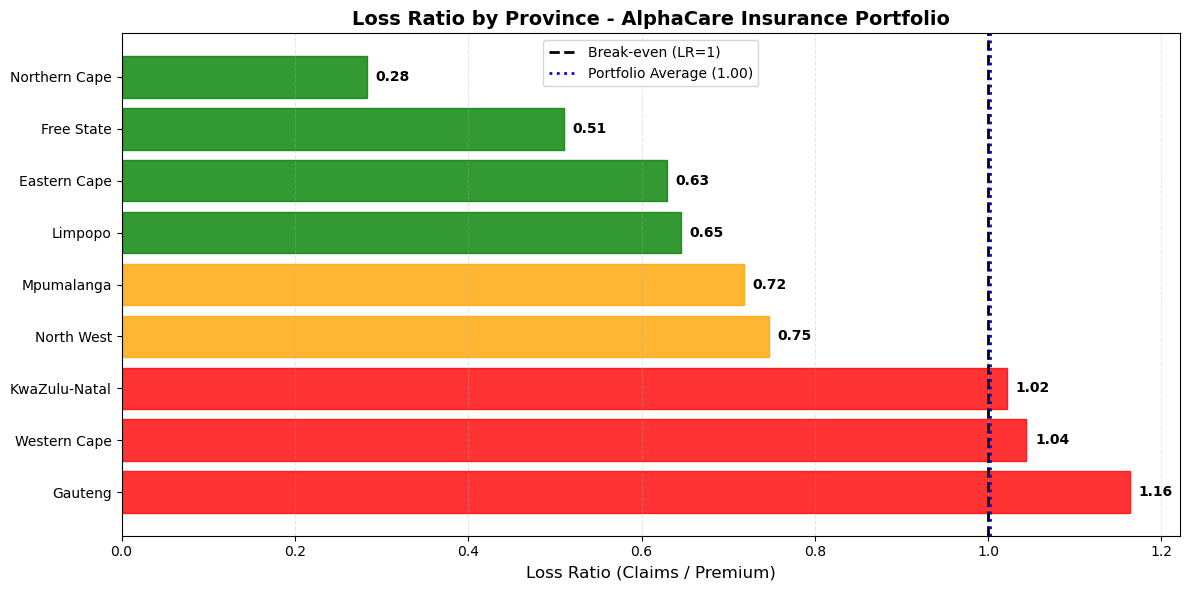

✓ Created Visualization 1: Loss Ratio by Province
  - Red: LR > 1 (Losing money on these policies)
  - Orange: 0.7 < LR ≤ 1 (High risk)
  - Green: LR ≤ 0.7 (Acceptable risk)
  - Saved to: reports/loss_ratio_by_province.png


In [27]:
# Cell 14: Visualization 1 - Loss Ratio by Province (VALID PREMIUMS)
plt.figure(figsize=(12, 6))

# Create horizontal bar chart
bars = plt.barh(range(len(province_stats)), province_stats['LossRatio'].values)

# Color coding
for i, bar in enumerate(bars):
    lr = province_stats.iloc[i]['LossRatio']
    if lr > 1:
        bar.set_color('red')
        bar.set_alpha(0.8)
    elif lr > 0.7:  # Changed threshold for orange
        bar.set_color('orange')
        bar.set_alpha(0.8)
    else:
        bar.set_color('green')
        bar.set_alpha(0.8)

plt.yticks(range(len(province_stats)), province_stats.index)
plt.xlabel('Loss Ratio (Claims / Premium)', fontsize=12)
plt.title('Loss Ratio by Province - AlphaCare Insurance Portfolio', fontsize=14, fontweight='bold')
plt.axvline(x=1, color='black', linestyle='--', linewidth=2, label='Break-even (LR=1)')
plt.axvline(x=df_valid['TotalClaims'].sum()/df_valid['TotalPremium'].sum(), 
            color='blue', linestyle=':', linewidth=2, 
            label=f'Portfolio Average ({df_valid["TotalClaims"].sum()/df_valid["TotalPremium"].sum():.2f})')

# Add grid for readability
plt.grid(axis='x', alpha=0.3, linestyle='--')

plt.legend(fontsize=10)

# Add value labels
for i, (province, row) in enumerate(province_stats.iterrows()):
    plt.text(row['LossRatio'] + 0.01, i, f"{row['LossRatio']:.2f}", 
             va='center', fontsize=10, fontweight='bold')

plt.tight_layout()

# Save the figure
plt.savefig('../reports/loss_ratio_by_province.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Created Visualization 1: Loss Ratio by Province")
print("  - Red: LR > 1 (Losing money on these policies)")
print("  - Orange: 0.7 < LR ≤ 1 (High risk)")
print("  - Green: LR ≤ 0.7 (Acceptable risk)")
print("  - Saved to: reports/loss_ratio_by_province.png")

In [29]:
print("=" * 60)
print("LOSS RATIO BY VEHICLE TYPE")
print("=" * 60)

# Use df_valid (policies with valid premiums)
vehicle_stats = df_valid.groupby('VehicleType').agg({
    'TotalPremium': 'sum',
    'TotalClaims': 'sum',
    'LossRatio': 'mean',
    'UnderwrittenCoverID': 'count'
}).round(3)

vehicle_stats = vehicle_stats.rename(columns={
    'UnderwrittenCoverID': 'PolicyCount',
    'LossRatio': 'AvgLossRatio'
})

# Calculate actual loss ratio
vehicle_stats['LossRatio'] = vehicle_stats['TotalClaims'] / vehicle_stats['TotalPremium']
vehicle_stats = vehicle_stats.sort_values('LossRatio', ascending=False)

print("\nVehicle Type Analysis:")
print(vehicle_stats[['PolicyCount', 'TotalPremium', 'TotalClaims', 'LossRatio']])

print(f"\nKEY INSIGHTS:")
print(f"1. Highest risk vehicle type: {vehicle_stats.index[0]} (LR: {vehicle_stats.iloc[0]['LossRatio']:.3f})")
print(f"2. Lowest risk vehicle type: {vehicle_stats.index[-1]} (LR: {vehicle_stats.iloc[-1]['LossRatio']:.3f})")
print(f"3. Most common vehicle type: {vehicle_stats['PolicyCount'].idxmax()} ({vehicle_stats['PolicyCount'].max():,} policies)")

LOSS RATIO BY VEHICLE TYPE

Vehicle Type Analysis:
                   PolicyCount  TotalPremium   TotalClaims  LossRatio
VehicleType                                                          
Heavy Commercial          4264  4.609479e+05  7.432425e+05   1.612422
Medium Commercial        33428  3.922840e+06  4.032212e+06   1.027881
Passenger Vehicle       577202  5.667341e+07  5.668048e+07   1.000125
Light Commercial          2614  2.604975e+05  6.045250e+04   0.232066
Bus                        450  5.824474e+04  0.000000e+00   0.000000

KEY INSIGHTS:
1. Highest risk vehicle type: Heavy Commercial (LR: 1.612)
2. Lowest risk vehicle type: Bus (LR: 0.000)
3. Most common vehicle type: Passenger Vehicle (577,202 policies)


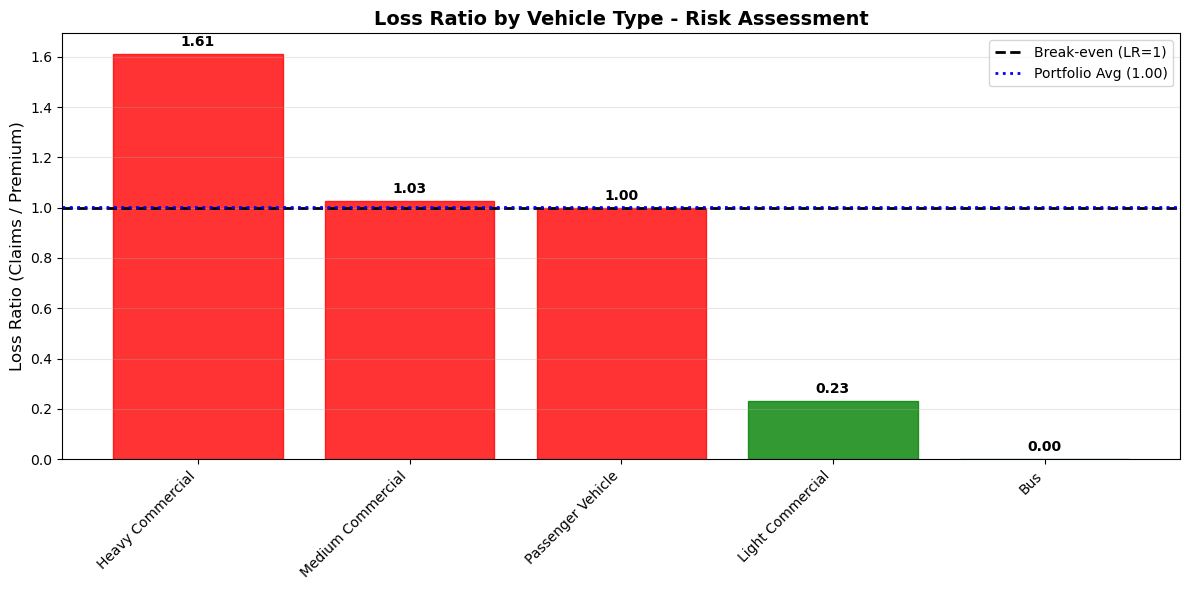

✓ Created Visualization 2: Loss Ratio by Vehicle Type


In [30]:
plt.figure(figsize=(12, 6))

# Create bar chart
x_pos = range(len(vehicle_stats))
bars = plt.bar(x_pos, vehicle_stats['LossRatio'].values)

# Color coding with different colors
colors = ['red', 'orange', 'yellow', 'lightgreen', 'green', 'blue']
for i, bar in enumerate(bars):
    lr = vehicle_stats.iloc[i]['LossRatio']
    if lr > 1:
        bar.set_color('red')
    elif lr > 0.8:
        bar.set_color('orange')
    elif lr > 0.6:
        bar.set_color('gold')
    else:
        bar.set_color('green')
    bar.set_alpha(0.8)

plt.xticks(x_pos, vehicle_stats.index, rotation=45, ha='right')
plt.ylabel('Loss Ratio (Claims / Premium)', fontsize=12)
plt.title('Loss Ratio by Vehicle Type - Risk Assessment', fontsize=14, fontweight='bold')

# Add horizontal lines
plt.axhline(y=1, color='black', linestyle='--', linewidth=2, label='Break-even (LR=1)')
portfolio_avg = df_valid['TotalClaims'].sum() / df_valid['TotalPremium'].sum()
plt.axhline(y=portfolio_avg, color='blue', linestyle=':', linewidth=2, 
            label=f'Portfolio Avg ({portfolio_avg:.2f})')

# Add value labels on top of bars
for i, (vehicle_type, row) in enumerate(vehicle_stats.iterrows()):
    plt.text(i, row['LossRatio'] + 0.02, f"{row['LossRatio']:.2f}", 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

# Save the figure
plt.savefig('../reports/loss_ratio_by_vehicle_type.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Created Visualization 2: Loss Ratio by Vehicle Type")

In [31]:
# Cell 17: Loss Ratio by Gender
print("=" * 60)
print("LOSS RATIO BY GENDER")
print("=" * 60)

# Check unique gender values
print("Unique gender values:")
print(df_valid['Gender'].value_counts())

# Group by gender
gender_stats = df_valid.groupby('Gender').agg({
    'TotalPremium': 'sum',
    'TotalClaims': 'sum',
    'LossRatio': 'mean',
    'UnderwrittenCoverID': 'count'
}).round(3)

gender_stats = gender_stats.rename(columns={
    'UnderwrittenCoverID': 'PolicyCount',
    'LossRatio': 'AvgLossRatio'
})

# Calculate actual loss ratio
gender_stats['LossRatio'] = gender_stats['TotalClaims'] / gender_stats['TotalPremium']
gender_stats = gender_stats.sort_values('LossRatio', ascending=False)

print("\nGender Analysis:")
print(gender_stats[['PolicyCount', 'TotalPremium', 'TotalClaims', 'LossRatio']])

print(f"\nKEY INSIGHTS:")
print(f"1. Highest risk gender: {gender_stats.index[0]} (LR: {gender_stats.iloc[0]['LossRatio']:.3f})")
print(f"2. Lowest risk gender: {gender_stats.index[-1]} (LR: {gender_stats.iloc[-1]['LossRatio']:.3f})")

LOSS RATIO BY GENDER
Unique gender values:
Gender
Not specified    591068
Male              19083
Female             3404
Name: count, dtype: int64

Gender Analysis:
               PolicyCount  TotalPremium   TotalClaims  LossRatio
Gender                                                           
Not specified       591068  5.920782e+07  6.007638e+07   1.014670
Female                3404  3.044806e+05  2.472774e+05   0.812129
Male                 19083  1.606618e+06  1.242916e+06   0.773623

KEY INSIGHTS:
1. Highest risk gender: Not specified (LR: 1.015)
2. Lowest risk gender: Male (LR: 0.774)


<Figure size 1000x600 with 0 Axes>

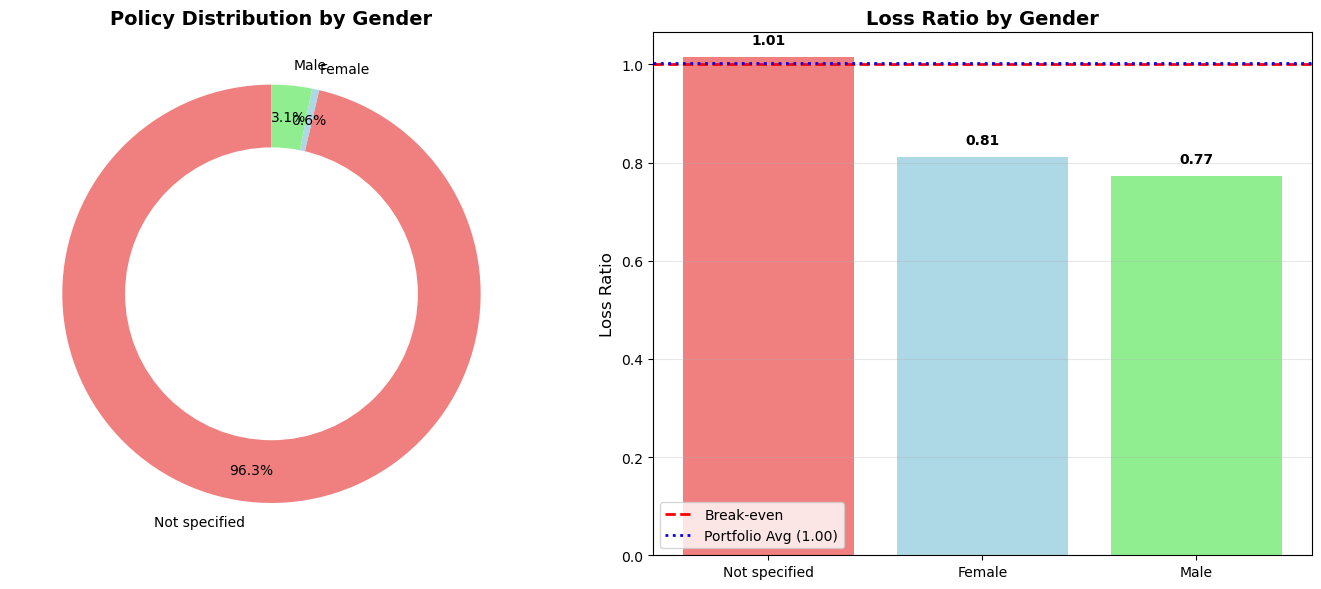

✓ Created Visualization 3: Gender Analysis
  - Left: Policy distribution (donut chart)
  - Right: Loss Ratio comparison
  - Saved to: reports/loss_ratio_by_gender.png


In [32]:
plt.figure(figsize=(10, 6))

# Create a more creative visualization: Donut chart for policy distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Subplot 1: Donut chart of policy distribution by gender
policy_counts = gender_stats['PolicyCount']
colors = ['lightcoral', 'lightblue', 'lightgreen', 'gold', 'lightpink']
wedges, texts, autotexts = ax1.pie(policy_counts, labels=gender_stats.index, 
                                   autopct='%1.1f%%', colors=colors,
                                   startangle=90, pctdistance=0.85)
ax1.set_title('Policy Distribution by Gender', fontsize=14, fontweight='bold')

# Draw a circle in the center to make it a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
ax1.add_artist(centre_circle)

# Subplot 2: Loss Ratio comparison
x_pos = range(len(gender_stats))
bars = ax2.bar(x_pos, gender_stats['LossRatio'].values, color=['lightcoral', 'lightblue', 'lightgreen', 'gold', 'lightpink'])

ax2.set_xticks(x_pos)
ax2.set_xticklabels(gender_stats.index)
ax2.set_ylabel('Loss Ratio', fontsize=12)
ax2.set_title('Loss Ratio by Gender', fontsize=14, fontweight='bold')
ax2.axhline(y=1, color='red', linestyle='--', linewidth=2, label='Break-even')
ax2.axhline(y=portfolio_avg, color='blue', linestyle=':', linewidth=2, 
            label=f'Portfolio Avg ({portfolio_avg:.2f})')

# Add value labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.02,
             f'{height:.2f}', ha='center', va='bottom', fontweight='bold')

ax2.legend()
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/loss_ratio_by_gender.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Created Visualization 3: Gender Analysis")
print("  - Left: Policy distribution (donut chart)")
print("  - Right: Loss Ratio comparison")
print("  - Saved to: reports/loss_ratio_by_gender.png")


DISTRIBUTIONS OF KEY FINANCIAL VARIABLES
Analyzing 5 financial variables...

TotalPremium:
  Mean: 100.20
  Median: 7.28
  Std Dev: 286.24
  Min: 0.00
  Max: 65,282.60

TotalClaims:
  Mean: 100.41
  Median: 0.00
  Std Dev: 2,989.98
  Min: -12,002.41
  Max: 393,092.11

SumInsured:
  Mean: 609,826.86
  Median: 7,500.00
  Std Dev: 1,515,211.07
  Min: 0.01
  Max: 12,636,200.00

CustomValueEstimate:
  Mean: 231,256.33
  Median: 220,000.00
  Std Dev: 667,401.64
  Min: 20,000.00
  Max: 26,550,000.00

LossRatio:
  Mean: 0.35
  Median: 0.00
  Std Dev: 9.29
  Min: -18.70
  Max: 2,553.60


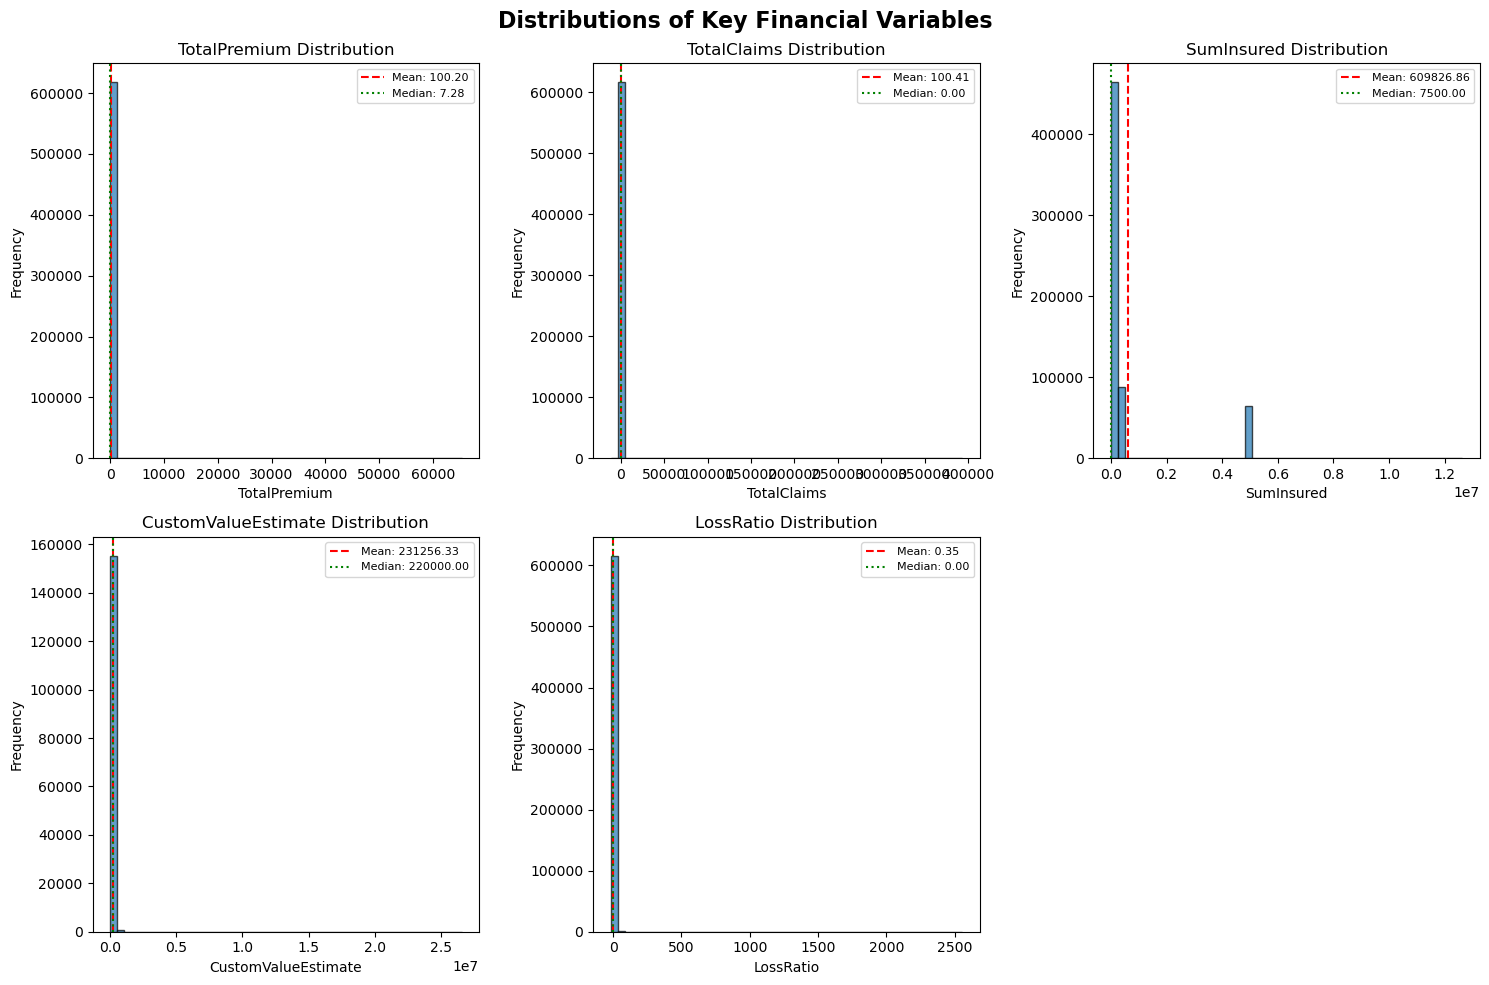

In [33]:
print("=" * 60)
print("DISTRIBUTIONS OF KEY FINANCIAL VARIABLES")
print("=" * 60)

# Select key numerical columns
financial_cols = ['TotalPremium', 'TotalClaims', 'SumInsured', 'CustomValueEstimate', 'LossRatio']
financial_cols = [col for col in financial_cols if col in df_valid.columns]

print(f"Analyzing {len(financial_cols)} financial variables...")

# Create subplots for distributions
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distributions of Key Financial Variables', fontsize=16, fontweight='bold')

for idx, col in enumerate(financial_cols):
    row = idx // 3
    col_pos = idx % 3
    
    # Plot histogram
    data = df_valid[col].dropna()
    axes[row, col_pos].hist(data, bins=50, alpha=0.7, edgecolor='black')
    axes[row, col_pos].set_title(f'{col} Distribution')
    axes[row, col_pos].set_xlabel(col)
    axes[row, col_pos].set_ylabel('Frequency')
    
    # Add statistics
    mean_val = data.mean()
    median_val = data.median()
    axes[row, col_pos].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    axes[row, col_pos].axvline(median_val, color='green', linestyle=':', label=f'Median: {median_val:.2f}')
    axes[row, col_pos].legend(fontsize=8)
    
    print(f"\n{col}:")
    print(f"  Mean: {mean_val:,.2f}")
    print(f"  Median: {median_val:,.2f}")
    print(f"  Std Dev: {data.std():,.2f}")
    print(f"  Min: {data.min():,.2f}")
    print(f"  Max: {data.max():,.2f}")

# Remove empty subplot if needed
if len(financial_cols) < 6:
    for i in range(len(financial_cols), 6):
        row = i // 3
        col_pos = i % 3
        fig.delaxes(axes[row, col_pos])

plt.tight_layout()
plt.savefig('../reports/financial_distributions.png', dpi=150, bbox_inches='tight')
plt.show()

OUTLIER DETECTION - BOX PLOTS
TotalPremium outliers (>1.5*IQR): 105,952 (17.1%)


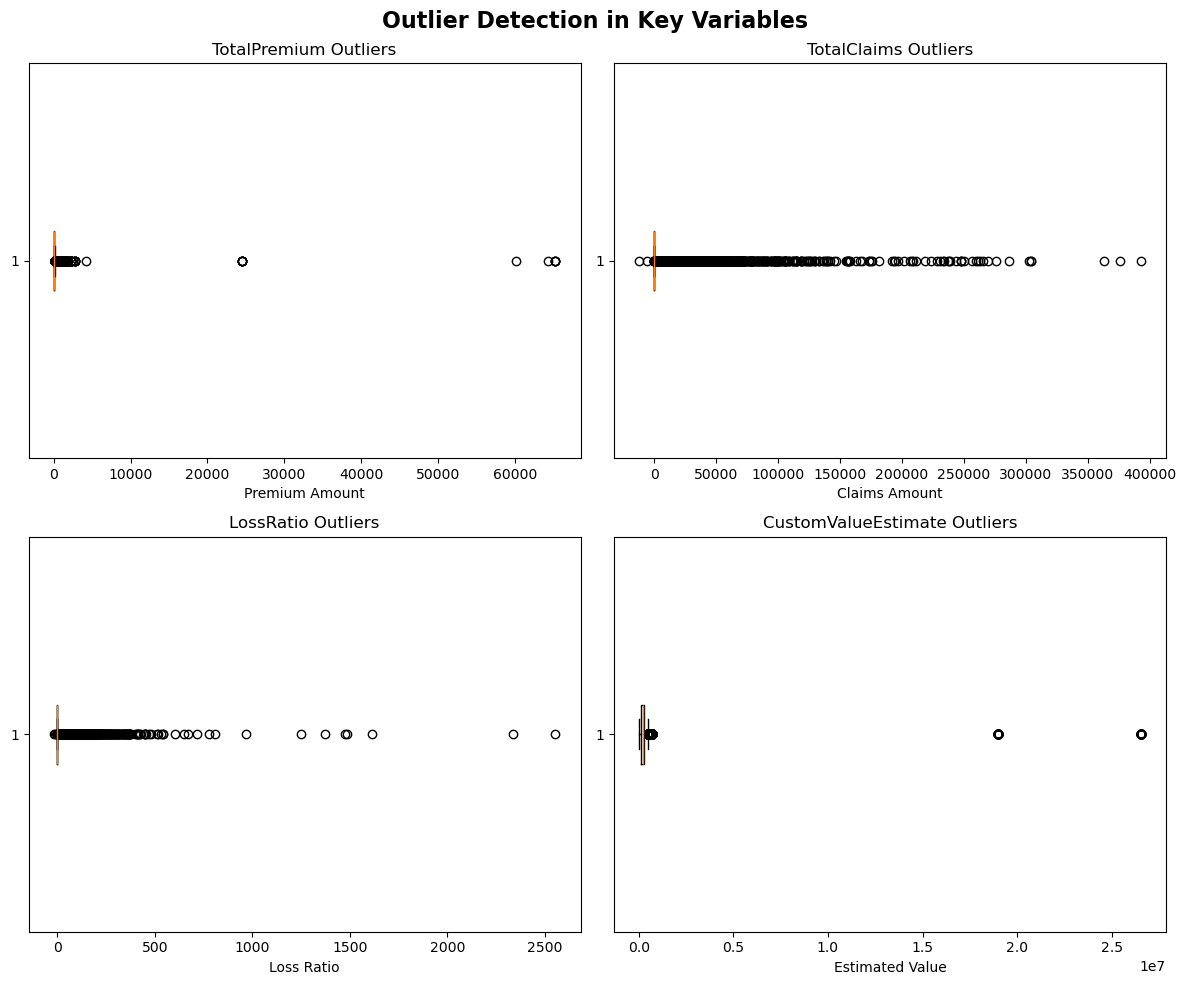


Outlier Summary:
• Consider investigating policies with extreme LossRatio values
• High premium outliers might be commercial policies
• High claim outliers indicate large losses


In [34]:
# Cell 20: Outlier Detection with Box Plots
print("=" * 60)
print("OUTLIER DETECTION - BOX PLOTS")
print("=" * 60)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Outlier Detection in Key Variables', fontsize=16, fontweight='bold')

# Box plot 1: TotalPremium
axes[0, 0].boxplot(df_valid['TotalPremium'].dropna(), vert=False)
axes[0, 0].set_title('TotalPremium Outliers')
axes[0, 0].set_xlabel('Premium Amount')

# Calculate IQR for TotalPremium
Q1 = df_valid['TotalPremium'].quantile(0.25)
Q3 = df_valid['TotalPremium'].quantile(0.75)
IQR = Q3 - Q1
outliers_premium = df_valid[(df_valid['TotalPremium'] < Q1 - 1.5*IQR) | 
                            (df_valid['TotalPremium'] > Q3 + 1.5*IQR)].shape[0]
print(f"TotalPremium outliers (>1.5*IQR): {outliers_premium:,} ({outliers_premium/len(df_valid)*100:.1f}%)")

# Box plot 2: TotalClaims
axes[0, 1].boxplot(df_valid['TotalClaims'].dropna(), vert=False)
axes[0, 1].set_title('TotalClaims Outliers')
axes[0, 1].set_xlabel('Claims Amount')

# Box plot 3: LossRatio
axes[1, 0].boxplot(df_valid['LossRatio'].dropna(), vert=False)
axes[1, 0].set_title('LossRatio Outliers')
axes[1, 0].set_xlabel('Loss Ratio')

# Box plot 4: CustomValueEstimate (if exists)
if 'CustomValueEstimate' in df_valid.columns:
    axes[1, 1].boxplot(df_valid['CustomValueEstimate'].dropna(), vert=False)
    axes[1, 1].set_title('CustomValueEstimate Outliers')
    axes[1, 1].set_xlabel('Estimated Value')
else:
    fig.delaxes(axes[1, 1])

plt.tight_layout()
plt.savefig('../reports/outlier_detection.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nOutlier Summary:")
print(f"• Consider investigating policies with extreme LossRatio values")
print(f"• High premium outliers might be commercial policies")
print(f"• High claim outliers indicate large losses")

TEMPORAL TRENDS ANALYSIS
Monthly Portfolio Performance:
                  TotalPremium   TotalClaims  PolicyCount  LossRatio
TransactionMonth                                                    
2013-10           3.710635e+02  0.000000e+00           36   0.000000
2013-11           2.159196e+04  5.058508e+04          524   2.342773
2013-12           4.366881e+04  9.283386e+03          585   0.212586
2014-01           5.669357e+04  1.028016e+04          764   0.181328
2014-02           6.339680e+04  3.588042e+04          865   0.565966
2014-03           1.011856e+05  1.463812e+05         1504   1.446661
2014-04           2.368827e+05  2.408658e+05         3039   1.016814
2014-05           3.785201e+05  4.067548e+05         4715   1.074592
2014-06           4.888278e+05  4.722523e+05         5885   0.966091
2014-07           6.118770e+05  3.861800e+05         7854   0.631140
2014-08           9.100720e+05  6.273545e+05        10785   0.689346
2014-09           1.240249e+06  6.517400e+05   

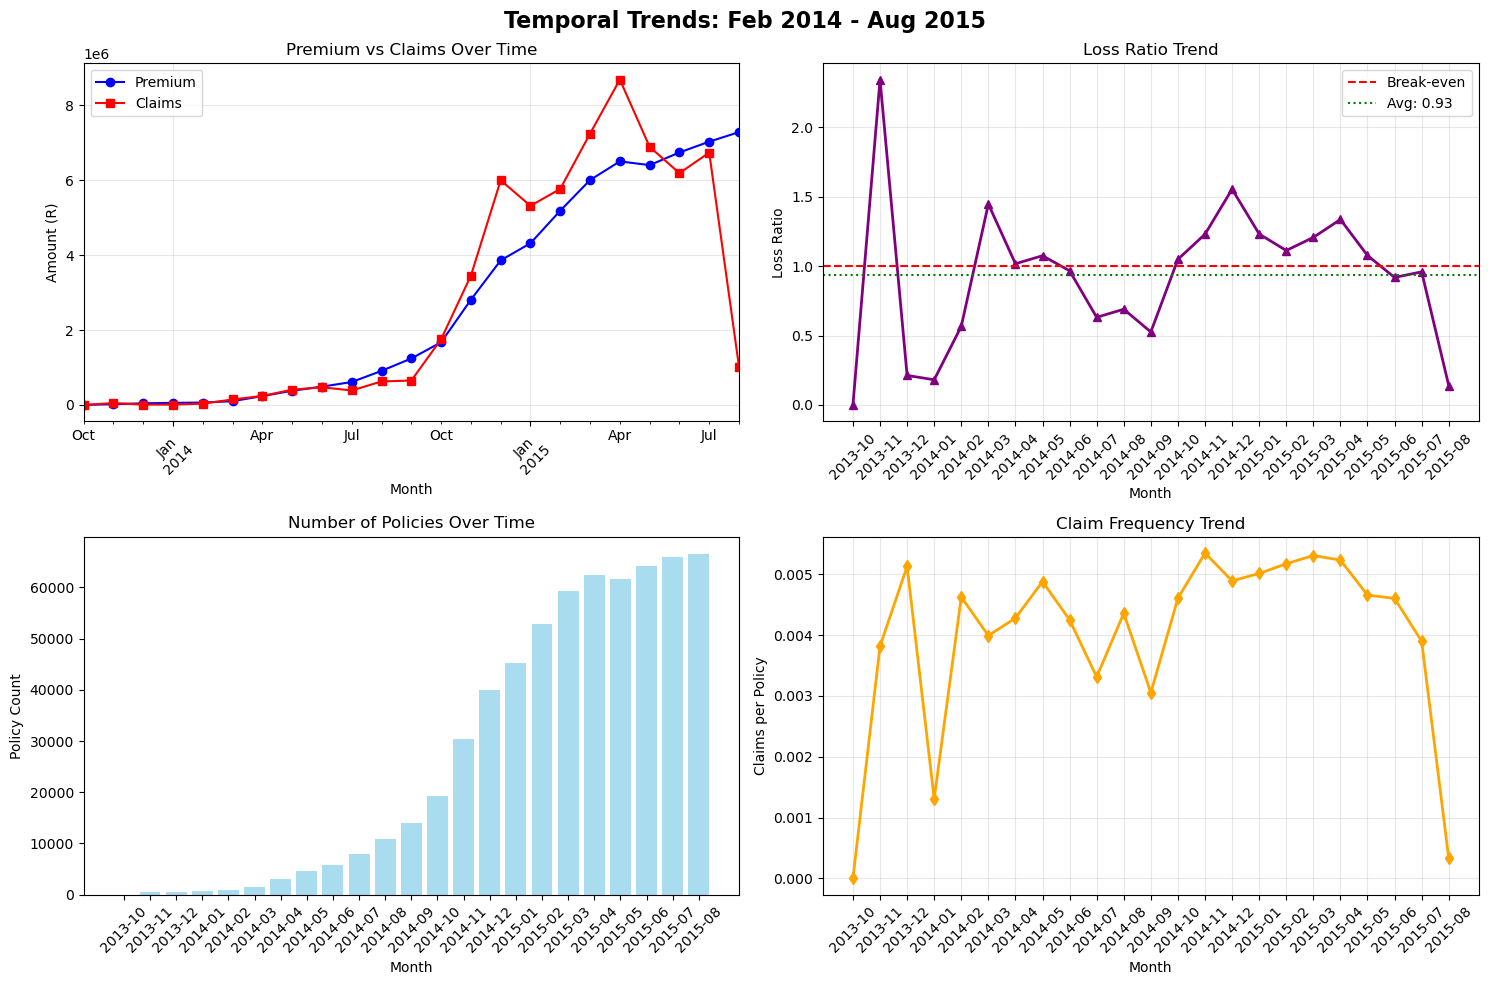


Temporal Insights:
• Date range: 2013-10-01 to 2015-08-01
• Average monthly Loss Ratio: 0.933
• Highest Loss Ratio month: 2013-11 (2.343)
• Lowest Loss Ratio month: 2013-10 (0.000)


In [35]:
# Cell 21: Temporal Trends Over 18-Month Period
print("=" * 60)
print("TEMPORAL TRENDS ANALYSIS")
print("=" * 60)

# Convert TransactionMonth to datetime if not already
df_valid['TransactionMonth'] = pd.to_datetime(df_valid['TransactionMonth'])

# Group by month
monthly_stats = df_valid.groupby(df_valid['TransactionMonth'].dt.to_period('M')).agg({
    'TotalPremium': 'sum',
    'TotalClaims': 'sum',
    'UnderwrittenCoverID': 'count'
}).sort_index()

monthly_stats['LossRatio'] = monthly_stats['TotalClaims'] / monthly_stats['TotalPremium']
monthly_stats = monthly_stats.rename(columns={'UnderwrittenCoverID': 'PolicyCount'})

print("Monthly Portfolio Performance:")
print(monthly_stats)

# Create temporal visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Temporal Trends: Feb 2014 - Aug 2015', fontsize=16, fontweight='bold')

# Plot 1: Premium and Claims over time
monthly_stats['TotalPremium'].plot(ax=axes[0, 0], color='blue', marker='o', label='Premium')
monthly_stats['TotalClaims'].plot(ax=axes[0, 0], color='red', marker='s', label='Claims')
axes[0, 0].set_title('Premium vs Claims Over Time')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Amount (R)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: Loss Ratio over time
axes[0, 1].plot(monthly_stats.index.astype(str), monthly_stats['LossRatio'], 
                color='purple', marker='^', linewidth=2)
axes[0, 1].axhline(y=1, color='red', linestyle='--', label='Break-even')
axes[0, 1].axhline(y=monthly_stats['LossRatio'].mean(), color='green', 
                   linestyle=':', label=f'Avg: {monthly_stats["LossRatio"].mean():.2f}')
axes[0, 1].set_title('Loss Ratio Trend')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Loss Ratio')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: Policy count over time
axes[1, 0].bar(monthly_stats.index.astype(str), monthly_stats['PolicyCount'], 
               color='skyblue', alpha=0.7)
axes[1, 0].set_title('Number of Policies Over Time')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Policy Count')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot 4: Claim frequency (claims per policy)
monthly_stats['ClaimFrequency'] = (df_valid.groupby(df_valid['TransactionMonth'].dt.to_period('M'))
                                   ['TotalClaims'].apply(lambda x: (x > 0).sum()))
monthly_stats['ClaimFrequency'] = monthly_stats['ClaimFrequency'] / monthly_stats['PolicyCount']

axes[1, 1].plot(monthly_stats.index.astype(str), monthly_stats['ClaimFrequency'], 
                color='orange', marker='d', linewidth=2)
axes[1, 1].set_title('Claim Frequency Trend')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Claims per Policy')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('../reports/temporal_trends.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nTemporal Insights:")
print(f"• Date range: {df_valid['TransactionMonth'].min().date()} to {df_valid['TransactionMonth'].max().date()}")
print(f"• Average monthly Loss Ratio: {monthly_stats['LossRatio'].mean():.3f}")
print(f"• Highest Loss Ratio month: {monthly_stats['LossRatio'].idxmax()} ({monthly_stats['LossRatio'].max():.3f})")
print(f"• Lowest Loss Ratio month: {monthly_stats['LossRatio'].idxmin()} ({monthly_stats['LossRatio'].min():.3f})")

In [ ]:
cp .gitignore .gitignore.backup

cat > .gitignore << 'EOL'
data/raw/
data/processed/


__pycache__/
*.py[cod]
*.so
.Python
env/
venv/
.env
.venv

.ipynb_checkpoints/
*.ipynb


.DS_Store
Thumbs.db

EOL